<a href="https://colab.research.google.com/github/Asustuf/In_action_or_stop/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Asustuf/In_action_or_stop

Cloning into 'In_action_or_stop'...
remote: Enumerating objects: 654, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 654 (delta 19), reused 15 (delta 7), pack-reused 625
Receiving objects: 100% (654/654), 337.34 MiB | 30.71 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Updating files: 100% (732/732), done.


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='/content/In_action_or_stop/classification_model.tflite')
interpreter.allocate_tensors()

In [5]:
# Define the input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [26]:
# Load an image from the validation folder (replace with the actual image path)
image_path = '/content/In_action_or_stop/validation/valid27.jpg'
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image) / 255.0  # Normalize the image

In [27]:
# Prepare the image for inference
interpreter.set_tensor(input_details[0]['index'], np.expand_dims(image_array, axis=0))

In [28]:
# Run inference
interpreter.invoke()

In [29]:
# Get the output
output = interpreter.get_tensor(output_details[0]['index'])

In [30]:
# Interpret the output (0 for 'in action', 1 for 'stop' based on your model)
if output < 0.5:
    prediction = 'in action'
else:
    prediction = 'stop'

Predicted class: in action


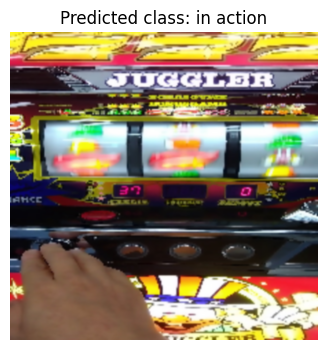

In [31]:
# Set the display size similar to a vertical video
plt.figure(figsize=(4,4))  # Adjust the figure size as needed
plt.imshow(image, interpolation='bicubic')  # Set interpolation method to 'bicubic'
plt.title(f"Predicted class: {prediction}")
plt.axis('off')
plt.show()